# Paper tables and figures generation

In [1]:
import pickle

v_acc_d = {}

f = open('store_acc_ConstantPadding.pckl', 'rb')
v_acc_d.update({'Constant' : pickle.load(f)})
f.close()

f = open('store_acc_RandomPadding.pckl', 'rb')
v_acc_d.update({'Random' : pickle.load(f)})
f.close()

f = open('store_acc_NewPadding.pckl', 'rb')
v_acc_d.update({'New' : pickle.load(f)})
f.close()

import numpy as np
from tensorflow import keras
from sklearn import preprocessing


train_labels=np.load("train_labels.npy")
val_labels=np.load("val_labels.npy")
test_labels=np.load("test_labels.npy")

num_classes = len(np.unique(train_labels))
print(num_classes)

le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_num = le.transform(train_labels)
val_labels_num = le.transform(val_labels)
test_labels_num = le.transform(test_labels)

train_labels_bin = keras.utils.to_categorical(train_labels_num, num_classes)
val_labels_bin = keras.utils.to_categorical(val_labels_num, num_classes)
test_labels_bin = keras.utils.to_categorical(test_labels_num, num_classes)





30


### Plots the accuracy/MCC vs boundary noise

3mer 0 0.9204756321479138 0.9296070460704607
3mer 25 0.9371956801779466 0.9447154471544715
3mer 50 0.9222443277914769 0.9311653116531166
3mer 75 0.9041232210362774 0.9148373983739837
3mer 100 0.9225857188263336 0.9317073170731708
2mer 0 0.9379197954549628 0.9455284552845529
2mer 25 0.944249628092878 0.9510162601626017
2mer 50 0.9336777647986952 0.9416666666666667
2mer 75 0.9408171617885919 0.9481029810298103
2mer 100 0.9227752820773596 0.9317073170731708
1mer 0 0.9052524387592314 0.9159214092140922
1mer 25 0.9311571508680694 0.9393631436314364
1mer 50 0.9296045631489527 0.9380758807588075
1mer 75 0.9212651392710527 0.9305555555555556
1mer 100 0.9094101967634721 0.9199186991869919
Snake 0 0.9026333883700702 0.9138211382113821
Snake 25 0.8952123920099433 0.907249322493225
Snake 50 0.8924034448940856 0.9051490514905149
Snake 75 0.8423721544275509 0.858130081300813
Snake 100 0.8452432456455987 0.8606368563685637
Morton 0 0.8835497814597656 0.8975609756097561
Morton 25 0.8505394874142543 0.

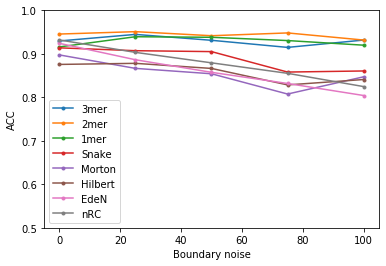

In [4]:
# plots accuracy or MCC VS bnoise
from sklearn.metrics import *
from ExpConfiguration import *


import matplotlib.pyplot as plt
y_true = np.argmax(test_labels_bin, axis=1)

# plot parameters
nl=3  # cnn layer to plot
#padd = 'Constant'  # padding to plot
#padd = 'Random'  # padding to plot
padd = 'New' 
v_acc = v_acc_d[padd]
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score

fig, ax = plt.subplots()
plt.xlabel('Boundary noise')
plt.ylabel(pmetric)
#plt.title('CNN n. layers = '+str(nl))
plt.ylim(0.5, 1) 
for en in seqEncoders:
    mtr=[]
    for bn in bnoise:
        y_pred = v_acc[str(nl)][en['filename']][str(bn)]
        mtr.append(pmetricf(y_true,y_pred))
        #mtr.append(accuracy_score(y_true,y_pred))
        print(en['filename'],bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))
            
    ax.plot(bnoise, mtr, label=en['filename'],marker='o',markersize=3)
# add Eden
mtr=[]
for bn in bnoise:
    y_pred = np.loadtxt('test_pred_eden_'+str(bn)+'.txt',dtype='str')
    y_true = np.loadtxt('test_labels_eden_'+str(bn)+'.txt',dtype='str')
    mtr.append(pmetricf(y_true,y_pred))
    #mtr.append(accuracy_score(y_true,y_pred))
    print('EdeN',bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))

ax.plot(bnoise, mtr, label='EdeN',marker='o',markersize=3)
# add nRC
mtr=[]
for bn in bnoise:
    y_pred = np.loadtxt('test_pred_nrc_'+str(bn)+'.txt',dtype='str')
    y_true = np.loadtxt('test_labels_nrc_'+str(bn)+'.txt',dtype='str')
    mtr.append(pmetricf(y_true,y_pred))
    #mtr.append(accuracy_score(y_true,y_pred))
    print('nRC',bn,matthews_corrcoef(y_true,y_pred),accuracy_score(y_true,y_pred))


ax.plot(bnoise, mtr, label='nRC',marker='o',markersize=3)


ax.legend()
plt.savefig('figs/plot_bnoise-m'+pmetric+'_nl'+str(nl)+'_p'+padd+'.pdf')




### Plots accuracy with different padding schemas

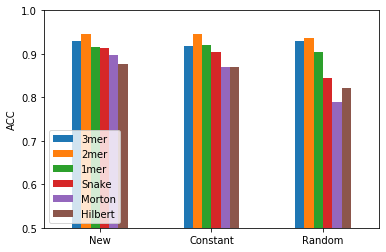

In [5]:
from sklearn.metrics import *
from ExpConfiguration import *
import matplotlib.pyplot as plt
import pandas as pd

nl=3  # cnn layer to plot
bn = 0
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score


y_true = np.argmax(test_labels_bin, axis=1)

index = ['New', 'Constant', 'Random']

cols = {}
for en in seqEncoders:
    y_pred = v_acc_d['New'][str(nl)][en['filename']][str(bn)]
    pnew = pmetricf(y_true,y_pred)
    y_pred = v_acc_d['Constant'][str(nl)][en['filename']][str(bn)]
    pcns = pmetricf(y_true,y_pred)
    y_pred = v_acc_d['Random'][str(nl)][en['filename']][str(bn)]
    prnd = pmetricf(y_true,y_pred)

    performance = [pnew,pcns,prnd]
    cols.update({en['filename'] : performance})



df = pd.DataFrame(cols, index=index)
ax = df.plot.bar(rot=0,ylim=(0.5,1))

ax.legend(loc='lower left')
#plt.title('Input padding symbol')
plt.ylabel('ACC')
plt.savefig('figs/plot-padding.pdf')




### Plots accuracy/MCC with different CNN n. of layers

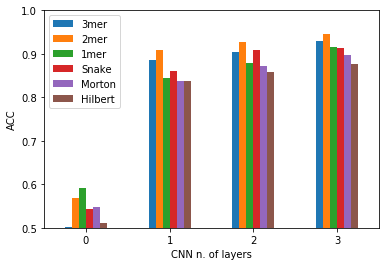

In [6]:
from sklearn.metrics import *
from ExpConfiguration import *
import matplotlib.pyplot as plt
import pandas as pd

bn = 0
#padd = 'Constant'  # padding to plot
padd = 'New'  # padding to plot
#padd = 'Random'  # padding to plot
v_acc = v_acc_d[padd]
#pmetric = 'MCC'
#pmetricf = matthews_corrcoef
pmetric = 'ACC'
pmetricf = accuracy_score


y_true = np.argmax(test_labels_bin, axis=1)

index = ['0', '1', '2','3']

cols = {}
for en in seqEncoders:
    y_pred = v_acc[str(0)][en['filename']][str(bn)]
    p0 = pmetricf(y_true,y_pred)
    y_pred = v_acc[str(1)][en['filename']][str(bn)]
    p1 = pmetricf(y_true,y_pred)
    y_pred = v_acc[str(2)][en['filename']][str(bn)]
    p2 = pmetricf(y_true,y_pred)
    y_pred = v_acc[str(3)][en['filename']][str(bn)]
    p3 = pmetricf(y_true,y_pred)
    
    performance = [p0,p1,p2,p3]
    cols.update({en['filename'] : performance})



df = pd.DataFrame(cols, index=index)
ax = df.plot.bar(rot=0,ylim=(0.5,1))

ax.legend(loc='upper left')
#plt.title('CNN number of layers')
plt.ylabel('ACC')
plt.xlabel('CNN n. of layers')
plt.savefig('figs/plot-cnnlayers.pdf')



## Generates tables with precisions and recalls

In [7]:
# tables precision recall f1 and macro/weighted averages 
# at certain bnoise and n CNN layers 

from sklearn.metrics import *
import pandas as pd
import numpy as np
from ExpConfiguration import *

# table parameters
nl=3  # cnn layer 
bn = 100 # bnoise
#padd = 'Constant'  # padding to plot
padd = 'New'  # padding to plot
#padd = 'Random'  # padding to plot
v_acc = v_acc_d[padd]


y_true = np.argmax(test_labels_bin, axis=1)
y_true = le.inverse_transform(y_true)


dfs = {}
for en in seqEncoders:
    y_pred = v_acc[str(nl)][en['filename']][str(bn)]
    y_pred = le.inverse_transform(y_pred)
    cr = classification_report(y_true,y_pred,output_dict=True,digits=2)
    df1 = pd.DataFrame(cr).drop(index=['support'])
    df1.drop(columns=['accuracy'])
    df1.index = ['P','R','F1']
    dfs[en['filename']] = df1

y_pred = np.loadtxt('test_pred_eden_'+str(bn)+'.txt',dtype='str')
y_true = np.loadtxt('test_labels_eden_'+str(bn)+'.txt',dtype='str')
cr = classification_report(y_true,y_pred,output_dict=True,digits=2)
df1 = pd.DataFrame(cr).drop(index=['support'])
df1.drop(columns=['accuracy'])
df1.index = ['P','R','F1']
dfs['EdeN'] = df1

y_pred = np.loadtxt('test_pred_nrc_'+str(bn)+'.txt',dtype='str')
y_true = np.loadtxt('test_labels_nrc_'+str(bn)+'.txt',dtype='str')
cr = classification_report(y_true,y_pred,output_dict=True,digits=2)
df1 = pd.DataFrame(cr) #.drop(index=['support'])
df1.drop(columns=['accuracy'])
df1.index = ['P','R','F1','Class size']
dfs['nRC'] = df1

df = pd.concat(dfs)
df = df.transpose()
df.astype({('nRC','Class size'): 'int32'})

with open('tables/prf-table_bn'+str(bn)+'_nl'+str(nl)+'_p'+padd+'.tex','w') as tf:
    tf.write(df.to_latex(float_format="{:0.2f}".format))

from scipy import stats
import scipy as sp
import numpy as np

dfn = df.to_numpy()

for i in range(df.shape[1]):
    s=dfn[:-3,i]
    n, min_max, mean, var, skew, kurt = stats.describe(s)
    std=math.sqrt(var)
    R = stats.t.interval(0.95,len(s)-1,loc=mean,scale=std/math.sqrt(len(s)))



In [8]:
df

3mer                          2mer                      \
                     P         R        F1         P         R        F1   
RF00001       0.984474  0.881112  0.929929  0.993981  0.892434  0.940475   
RF00005       0.906507  0.953227  0.929280  0.925747  0.912516  0.919084   
RF00015       0.960000  0.868778  0.912114  0.870833  0.945701  0.906725   
RF00016       0.895833  0.320896  0.472527  0.872093  0.559701  0.681818   
RF00019       0.959916  0.997807  0.978495  0.811052  0.997807  0.894789   
RF00020       0.621212  0.500000  0.554054  0.607843  0.378049  0.466165   
RF00026       0.994949  0.977937  0.986370  0.998312  0.978489  0.988301   
RF00029       0.092593  1.000000  0.169492  0.250000  1.000000  0.400000   
RF00050       0.986737  0.984127  0.985430  0.961637  0.994709  0.977893   
RF00059       0.905325  0.980141  0.941249  0.979765  0.961563  0.970579   
RF00066       0.709677  0.992481  0.827586  0.490775  1.000000  0.658416   
RF00097       0.974719  0.967922  0.971309  0.988489  0.958159  0.973088   
RF00156       0.620370  0.848101  0.716578  0.423529  0.911392  0.578313   
RF00162       0.901515  0.929688  0.915385  0.882353  0.937500  0.909091   
RF00169       0.967655  0.942257  0.954787  0.951157  0.971129  0.961039   
RF00409       1.000000  0.991903  0.995935  0.995951  0.995951  0.995951   
RF00504       0.987315  0.976987  0.982124  0.981405  0.993724  0.987526   
RF00557       0.864198  0.945946  0.903226  0.935065  0.972973  0.953642   
RF00560       0.748148  0.918182  0.824490  0.620690  0.981818  0.760563   
RF00619       0.473684  0.765957  0.585366  0.525424  0.659574  0.584906   
RF00645       0.765432  1.000000  0.867133  0.873239  1.000000  0.932331   
RF00875       0.960630  0.976000  0.968254  0.800000  0.992000  0.885714   
RF00876       0.333333  1.000000  0.500000  0.651163  1.000000  0.788732   
RF00906       0.861111  0.826667  0.843537  0.802632  0.813333  0.807947   
RF01055       0.775194  0.900901  0.833333  0.719424  0.900901  0.800000   
RF01059       1.000000  1.000000  1.000000  0.750000  1.000000  0.857143   
RF01705       0.896552  0.903226  0.899876  0.918269  0.947891  0.932845   
RF01725       0.581633  0.863636  0.695122  0.883333  0.803030  0.841270   
RF01739       0.703704  0.950000  0.808511  0.375000  0.900000  0.529412   
RF01942       0.986907  0.969453  0.978102  0.975610  0.964630  0.970089   
accuracy      0.931707  0.931707  0.931707  0.931707  0.931707  0.931707   
macro avg     0.813977  0.904444  0.830986  0.793826  0.910833  0.828462   
weighted avg  0.942281  0.931707  0.933471  0.945475  0.931707  0.934942   

                  1mer                         Snake  ...   Hilbert            \
                     P         R        F1         P  ...         P         R   
RF00001       0.990531  0.888317  0.936644  0.984240  ...  0.974860  0.848173   
RF00005       0.930628  0.923777  0.927190  0.952323  ...  0.914441  0.800780   
RF00015       0.887892  0.895928  0.891892  0.969697  ...  0.853982  0.873303   
RF00016       0.692308  0.201493  0.312139  0.958333  ...  0.837209  0.268657   
RF00019       0.747126  0.997807  0.854460  0.953191  ...  0.800000  0.991228   
RF00020       0.473684  0.329268  0.388489  0.833333  ...  0.228814  0.329268   
RF00026       0.981440  0.962493  0.971874  0.959008  ...  0.984403  0.905130   
RF00029       0.051546  1.000000  0.098039  0.003670  ...  0.010929  0.400000   
RF00050       0.974227  1.000000  0.986945  0.870070  ...  0.916667  0.989418   
RF00059       0.977390  0.969250  0.973303  0.885119  ...  0.895503  0.867393   
RF00066       0.570815  1.000000  0.726776  0.764368  ...  0.744318  0.984962   
RF00097       0.986784  0.937238  0.961373  0.988287  ...  0.987539  0.884240   
RF00156       0.431034  0.949367  0.592885  0.595506  ...  0.267081  0.544304   
RF00162       0.902985  0.945312  0.923664  0.867769  ...  0.676301  0.914062   
RF00169       0.937337  0.942257  0.939791  0.862500  ...  0.